In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Stock list
stock_list = [
                'XLK',
                'XLV',
                'XLE',
                'VNQ',
                'XLF',
                'XLB',
                'XLU',
                'XLI',
                'XLP',
                'XLY',
                'XTL',
              ]

# Define dictionary
stock_df = {}

# Loop through stocks 
for stock in stock_list:
    # Read the data into DataFrames
    df = pd.read_csv(f'Resources/{stock}.csv')
    df.set_index('Date', inplace=True)
    
    # Trim to last n years
    stock_df[stock] = df.iloc[-1777:]
    #stock_df[stock] = df.iloc[-2029:]
    #stock_df[stock] = df.iloc[-2520:]
    #stock_df[stock] = df.iloc[-2768:]
    
    # Confirm shape
    #print(f'{stock}',stock_df[stock].shape)

In [3]:
# Loop through stocks 
for stock in stock_list:
    
    # Drop unnecessary columns
    stock_df[stock] = stock_df[stock].drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    # Rename columns
    stock_df[stock][f'{stock}_Adj_Close'] = stock_df[stock]['Adj Close']

    # Drop unnecessary columns
    stock_df[stock].drop(columns=['Adj Close'], inplace=True)

    # Calculate n-Day percent return features
    stock_df[stock][f'{stock}_1Day_Return'] = stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=1)
    stock_df[stock][f'{stock}_2Day_Return'] =  stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=2)
    stock_df[stock][f'{stock}_3Day_Return'] =  stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=3)
    stock_df[stock][f'{stock}_5Day_Return'] =  stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=5)
    stock_df[stock][f'{stock}_8Day_Return'] =  stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=8)
    stock_df[stock][f'{stock}_13Day_Return'] =  stock_df[stock][f'{stock}_Adj_Close'].pct_change(periods=13)

    # Calculate 3-day rolling average on n-day return features
    stock_df[stock][f'{stock}_1D_3D_Avg'] = stock_df[stock][f'{stock}_1Day_Return'].rolling(window=3).mean()
    stock_df[stock][f'{stock}_2D_3D_Avg'] = stock_df[stock][f'{stock}_2Day_Return'].rolling(window=3).mean()
    stock_df[stock][f'{stock}_3D_3D_Avg'] = stock_df[stock][f'{stock}_3Day_Return'].rolling(window=3).mean()
    stock_df[stock][f'{stock}_5D_3D_Avg'] = stock_df[stock][f'{stock}_5Day_Return'].rolling(window=3).mean()
    stock_df[stock][f'{stock}_8D_3D_Avg'] = stock_df[stock][f'{stock}_8Day_Return'].rolling(window=3).mean()
    stock_df[stock][f'{stock}_13D_3D_Avg'] = stock_df[stock][f'{stock}_13Day_Return'].rolling(window=3).mean()

    # Calculate polynominal features across averages
    stock_df[stock][f'{stock}_1D_Squared'] = stock_df[stock][f'{stock}_1D_3D_Avg'] ** 2
    stock_df[stock][f'{stock}_2D_Squared'] = stock_df[stock][f'{stock}_2D_3D_Avg'] ** 2
    stock_df[stock][f'{stock}_3D_Squared'] = stock_df[stock][f'{stock}_3D_3D_Avg'] ** 2
    stock_df[stock][f'{stock}_5D_Squared'] = stock_df[stock][f'{stock}_5D_3D_Avg'] ** 2
    stock_df[stock][f'{stock}_8D_Squared'] = stock_df[stock][f'{stock}_8D_3D_Avg'] ** 2
    stock_df[stock][f'{stock}_13D_Squared'] = stock_df[stock][f'{stock}_13D_3D_Avg'] ** 2

    # Calculate ratio features across averages
    stock_df[stock][f'{stock}_3D_1D_Ratio'] = stock_df[stock][f'{stock}_3D_3D_Avg'] / stock_df[stock][f'{stock}_1D_3D_Avg']
    stock_df[stock][f'{stock}_3D_2D_Ratio'] = stock_df[stock][f'{stock}_3D_3D_Avg'] * stock_df[stock][f'{stock}_2D_3D_Avg']
    stock_df[stock][f'{stock}_2D_1D_Ratio'] = stock_df[stock][f'{stock}_2D_3D_Avg'] * stock_df[stock][f'{stock}_1D_3D_Avg']

    # Drop NaN rows
    stock_df[stock].dropna(inplace=True)

    # Confirm shape
    print(f'{stock}',stock_df[stock].shape)

XLK (1762, 22)
XLV (1762, 22)
XLE (1762, 22)
VNQ (1762, 22)
XLF (1762, 22)
XLB (1762, 22)
XLU (1762, 22)
XLI (1762, 22)
XLP (1762, 22)
XLY (1762, 22)
XTL (1762, 22)


In [4]:
# Concatenate all dataframes into one
concatenated_df = pd.concat(stock_df.values(), keys=stock_df.keys(), axis=1)

In [5]:
# Display columns
print(concatenated_df.columns)

MultiIndex([('XLK',    'XLK_Adj_Close'),
            ('XLK',  'XLK_1Day_Return'),
            ('XLK',  'XLK_2Day_Return'),
            ('XLK',  'XLK_3Day_Return'),
            ('XLK',  'XLK_5Day_Return'),
            ('XLK',  'XLK_8Day_Return'),
            ('XLK', 'XLK_13Day_Return'),
            ('XLK',    'XLK_1D_3D_Avg'),
            ('XLK',    'XLK_2D_3D_Avg'),
            ('XLK',    'XLK_3D_3D_Avg'),
            ...
            ('XTL',   'XTL_13D_3D_Avg'),
            ('XTL',   'XTL_1D_Squared'),
            ('XTL',   'XTL_2D_Squared'),
            ('XTL',   'XTL_3D_Squared'),
            ('XTL',   'XTL_5D_Squared'),
            ('XTL',   'XTL_8D_Squared'),
            ('XTL',  'XTL_13D_Squared'),
            ('XTL',  'XTL_3D_1D_Ratio'),
            ('XTL',  'XTL_3D_2D_Ratio'),
            ('XTL',  'XTL_2D_1D_Ratio')],
           length=242)


In [6]:
# Loop through stocks 
for stock in stock_list:
    column_tuple = (f'{stock}', f'{stock}_Adj_Close')
    
    # Drop unnecessary columns
    if column_tuple in concatenated_df.columns:
        concatenated_df.drop(columns=[column_tuple], inplace=True)
    else:
        print(f"Column '{column_name}' not found in concatenated dataframe.")

In [7]:
# Display df
concatenated_df

XLK                                                  \
           XLK_1Day_Return XLK_2Day_Return XLK_3Day_Return XLK_5Day_Return   
Date                                                                         
2017-06-23        0.006256        0.006615        0.012226        0.019005   
2017-06-26       -0.005329        0.000894        0.001252       -0.001248   
2017-06-27       -0.016429       -0.021670       -0.015550       -0.009709   
2017-06-28        0.012527       -0.004107       -0.009414       -0.002861   
2017-06-29       -0.017931       -0.005628       -0.021964       -0.021090   
...                    ...             ...             ...             ...   
2024-06-18        0.001255        0.016427        0.020236        0.051051   
2024-06-20       -0.011235       -0.009995        0.005007        0.016753   
2024-06-21       -0.001748       -0.012964       -0.011725        0.007010   
2024-06-24       -0.024516       -0.026222       -0.037163       -0.021346   
2024-06-25        0.018344       -0.006622       -0.008359       -0.018270   

                                                                         \
           XLK_8Day_Return XLK_13Day_Return XLK_1D_3D_Avg XLK_2D_3D_Avg   
Date                                                                      
2017-06-23        0.007788        -0.010558      0.004062      0.003350   
2017-06-26        0.007267        -0.018921      0.000428      0.004481   
2017-06-27       -0.004824        -0.037223     -0.005167     -0.004720   
2017-06-28        0.009412        -0.000452     -0.003077     -0.008294   
2017-06-29       -0.023185        -0.012557     -0.007277     -0.010468   
...                    ...              ...           ...           ...   
2024-06-18        0.075825         0.102845      0.006719      0.015691   
2024-06-20        0.061271         0.088742      0.001724      0.008463   
2024-06-21        0.056720         0.084105     -0.003910     -0.002177   
2024-06-24        0.011992         0.055322     -0.012500     -0.016394   
2024-06-25        0.008253         0.051327     -0.002640     -0.015269   

                                        ...            XTL                 \
           XLK_3D_3D_Avg XLK_5D_3D_Avg  ... XTL_13D_3D_Avg XTL_1D_Squared   
Date                                    ...                                 
2017-06-23      0.007464      0.011969  ...      -0.022902   1.102793e-05   
2017-06-26      0.003779      0.009550  ...      -0.017996   2.062571e-05   
2017-06-27     -0.000691      0.002682  ...      -0.023207   4.033309e-06   
2017-06-28     -0.007904     -0.004606  ...      -0.017195   1.103858e-06   
2017-06-29     -0.015643     -0.011220  ...      -0.019972   3.714876e-05   
...                  ...           ...  ...            ...            ...   
2024-06-18      0.027106      0.058764  ...       0.011883   3.008048e-07   
2024-06-20      0.017420      0.045687  ...       0.003322   1.258279e-06   
2024-06-21      0.004506      0.024938  ...      -0.009094   1.903319e-05   
2024-06-24     -0.014627      0.000806  ...      -0.016777   1.001593e-05   
2024-06-25     -0.019082     -0.010869  ...      -0.022615   7.117981e-07   

                                                                        \
           XTL_2D_Squared XTL_3D_Squared XTL_5D_Squared XTL_8D_Squared   
Date                                                                     
2017-06-23   3.991493e-07       0.000057   1.811916e-04       0.000133   
2017-06-26   6.176318e-05       0.000015   4.017865e-05       0.000118   
2017-06-27   6.547870e-06       0.000034   2.724389e-05       0.000155   
2017-06-28   9.681666e-06       0.000002   4.315761e-07       0.000148   
2017-06-29   5.280156e-05       0.000087   2.267232e-06       0.000243   
...                   ...            ...            ...            ...   
2024-06-18   7.324399e-07       0.000008   3.382252e-08       0.000309   
2024-06-20   2.559800e-06       0.000003   6.608985e-08     

In [8]:
# Reorder columns
# Extract the list of columns
columns = concatenated_df.columns

# Initialize lists for storing column groups
return_columns = []
other_columns = []

# Loop through the columns to separate them based on the pattern
for col in columns:
    if '_1Day_Return' in col[1]:
        return_columns.append(col)
    else:
        other_columns.append(col)

# Create a new column order
new_column_order = other_columns + return_columns

# Reindex the DataFrame
concatenated_df = concatenated_df.reindex(columns=new_column_order)

# Print the reordered columns to verify
print(concatenated_df.columns)

MultiIndex([('XLK',  'XLK_2Day_Return'),
            ('XLK',  'XLK_3Day_Return'),
            ('XLK',  'XLK_5Day_Return'),
            ('XLK',  'XLK_8Day_Return'),
            ('XLK', 'XLK_13Day_Return'),
            ('XLK',    'XLK_1D_3D_Avg'),
            ('XLK',    'XLK_2D_3D_Avg'),
            ('XLK',    'XLK_3D_3D_Avg'),
            ('XLK',    'XLK_5D_3D_Avg'),
            ('XLK',    'XLK_8D_3D_Avg'),
            ...
            ('XLV',  'XLV_1Day_Return'),
            ('XLE',  'XLE_1Day_Return'),
            ('VNQ',  'VNQ_1Day_Return'),
            ('XLF',  'XLF_1Day_Return'),
            ('XLB',  'XLB_1Day_Return'),
            ('XLU',  'XLU_1Day_Return'),
            ('XLI',  'XLI_1Day_Return'),
            ('XLP',  'XLP_1Day_Return'),
            ('XLY',  'XLY_1Day_Return'),
            ('XTL',  'XTL_1Day_Return')],
           length=231)


In [9]:
# Initialize lists for storing index positions
day1_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_1Day_Return' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day1_column_indices.append(idx)

# Example usage: Select columns based on index positions
day1_columns_to_rank = concatenated_df.columns[day1_column_indices]

# Example usage: Print the selected columns
print(day1_columns_to_rank)

MultiIndex([('XLK', 'XLK_1Day_Return'),
            ('XLV', 'XLV_1Day_Return'),
            ('XLE', 'XLE_1Day_Return'),
            ('VNQ', 'VNQ_1Day_Return'),
            ('XLF', 'XLF_1Day_Return'),
            ('XLB', 'XLB_1Day_Return'),
            ('XLU', 'XLU_1Day_Return'),
            ('XLI', 'XLI_1Day_Return'),
            ('XLP', 'XLP_1Day_Return'),
            ('XLY', 'XLY_1Day_Return'),
            ('XTL', 'XTL_1Day_Return')],
           )


In [10]:
# Initialize lists for storing index positions
day2_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_2Day_Return' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day2_column_indices.append(idx)

# Example usage: Select columns based on index positions
day2_columns_to_rank = concatenated_df.columns[day2_column_indices]

# Example usage: Print the selected columns
print(day2_columns_to_rank)

MultiIndex([('XLK', 'XLK_2Day_Return'),
            ('XLV', 'XLV_2Day_Return'),
            ('XLE', 'XLE_2Day_Return'),
            ('VNQ', 'VNQ_2Day_Return'),
            ('XLF', 'XLF_2Day_Return'),
            ('XLB', 'XLB_2Day_Return'),
            ('XLU', 'XLU_2Day_Return'),
            ('XLI', 'XLI_2Day_Return'),
            ('XLP', 'XLP_2Day_Return'),
            ('XLY', 'XLY_2Day_Return'),
            ('XTL', 'XTL_2Day_Return')],
           )


In [11]:
# Initialize lists for storing index positions
day3_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_3Day_Return' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day3_column_indices.append(idx)

# Example usage: Select columns based on index positions
day3_columns_to_rank = concatenated_df.columns[day3_column_indices]

# Example usage: Print the selected columns
print(day3_columns_to_rank)

MultiIndex([('XLK', 'XLK_3Day_Return'),
            ('XLV', 'XLV_3Day_Return'),
            ('XLE', 'XLE_3Day_Return'),
            ('VNQ', 'VNQ_3Day_Return'),
            ('XLF', 'XLF_3Day_Return'),
            ('XLB', 'XLB_3Day_Return'),
            ('XLU', 'XLU_3Day_Return'),
            ('XLI', 'XLI_3Day_Return'),
            ('XLP', 'XLP_3Day_Return'),
            ('XLY', 'XLY_3Day_Return'),
            ('XTL', 'XTL_3Day_Return')],
           )


In [12]:
# Initialize lists for storing index positions
day1_3_avg_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_1D_3D_Avg' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day1_3_avg_column_indices.append(idx)

# Example usage: Select columns based on index positions
day1_3_avg_columns_to_rank = concatenated_df.columns[day1_3_avg_column_indices]

# Example usage: Print the selected columns
print(day1_3_avg_columns_to_rank)

MultiIndex([('XLK', 'XLK_1D_3D_Avg'),
            ('XLV', 'XLV_1D_3D_Avg'),
            ('XLE', 'XLE_1D_3D_Avg'),
            ('VNQ', 'VNQ_1D_3D_Avg'),
            ('XLF', 'XLF_1D_3D_Avg'),
            ('XLB', 'XLB_1D_3D_Avg'),
            ('XLU', 'XLU_1D_3D_Avg'),
            ('XLI', 'XLI_1D_3D_Avg'),
            ('XLP', 'XLP_1D_3D_Avg'),
            ('XLY', 'XLY_1D_3D_Avg'),
            ('XTL', 'XTL_1D_3D_Avg')],
           )


In [13]:
# Initialize lists for storing index positions
day2_3_avg_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_2D_3D_Avg' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day2_3_avg_column_indices.append(idx)

# Example usage: Select columns based on index positions
day2_3_avg_columns_to_rank = concatenated_df.columns[day2_3_avg_column_indices]

# Example usage: Print the selected columns
print(day2_3_avg_columns_to_rank)

MultiIndex([('XLK', 'XLK_2D_3D_Avg'),
            ('XLV', 'XLV_2D_3D_Avg'),
            ('XLE', 'XLE_2D_3D_Avg'),
            ('VNQ', 'VNQ_2D_3D_Avg'),
            ('XLF', 'XLF_2D_3D_Avg'),
            ('XLB', 'XLB_2D_3D_Avg'),
            ('XLU', 'XLU_2D_3D_Avg'),
            ('XLI', 'XLI_2D_3D_Avg'),
            ('XLP', 'XLP_2D_3D_Avg'),
            ('XLY', 'XLY_2D_3D_Avg'),
            ('XTL', 'XTL_2D_3D_Avg')],
           )


In [14]:
# Initialize lists for storing index positions
day3_3_avg_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_3D_3D_Avg' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day3_3_avg_column_indices.append(idx)

# Example usage: Select columns based on index positions
day3_3_avg_columns_to_rank = concatenated_df.columns[day3_3_avg_column_indices]

# Example usage: Print the selected columns
print(day3_3_avg_columns_to_rank)

MultiIndex([('XLK', 'XLK_3D_3D_Avg'),
            ('XLV', 'XLV_3D_3D_Avg'),
            ('XLE', 'XLE_3D_3D_Avg'),
            ('VNQ', 'VNQ_3D_3D_Avg'),
            ('XLF', 'XLF_3D_3D_Avg'),
            ('XLB', 'XLB_3D_3D_Avg'),
            ('XLU', 'XLU_3D_3D_Avg'),
            ('XLI', 'XLI_3D_3D_Avg'),
            ('XLP', 'XLP_3D_3D_Avg'),
            ('XLY', 'XLY_3D_3D_Avg'),
            ('XTL', 'XTL_3D_3D_Avg')],
           )


In [15]:
# Initialize lists for storing index positions
day3_1_ratio_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_3D_1D_Ratio' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day3_1_ratio_column_indices.append(idx)

# Example usage: Select columns based on index positions
day3_1_ratio_columns_to_rank = concatenated_df.columns[day3_1_ratio_column_indices]

# Example usage: Print the selected columns
print(day3_1_ratio_columns_to_rank)

MultiIndex([('XLK', 'XLK_3D_1D_Ratio'),
            ('XLV', 'XLV_3D_1D_Ratio'),
            ('XLE', 'XLE_3D_1D_Ratio'),
            ('VNQ', 'VNQ_3D_1D_Ratio'),
            ('XLF', 'XLF_3D_1D_Ratio'),
            ('XLB', 'XLB_3D_1D_Ratio'),
            ('XLU', 'XLU_3D_1D_Ratio'),
            ('XLI', 'XLI_3D_1D_Ratio'),
            ('XLP', 'XLP_3D_1D_Ratio'),
            ('XLY', 'XLY_3D_1D_Ratio'),
            ('XTL', 'XTL_3D_1D_Ratio')],
           )


In [16]:
# Initialize lists for storing index positions
day3_2_ratio_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_3D_2D_Ratio' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day3_2_ratio_column_indices.append(idx)

# Example usage: Select columns based on index positions
day3_2_ratio_columns_to_rank = concatenated_df.columns[day3_2_ratio_column_indices]

# Example usage: Print the selected columns
print(day3_2_ratio_columns_to_rank)

MultiIndex([('XLK', 'XLK_3D_2D_Ratio'),
            ('XLV', 'XLV_3D_2D_Ratio'),
            ('XLE', 'XLE_3D_2D_Ratio'),
            ('VNQ', 'VNQ_3D_2D_Ratio'),
            ('XLF', 'XLF_3D_2D_Ratio'),
            ('XLB', 'XLB_3D_2D_Ratio'),
            ('XLU', 'XLU_3D_2D_Ratio'),
            ('XLI', 'XLI_3D_2D_Ratio'),
            ('XLP', 'XLP_3D_2D_Ratio'),
            ('XLY', 'XLY_3D_2D_Ratio'),
            ('XTL', 'XTL_3D_2D_Ratio')],
           )


In [17]:
# Initialize lists for storing index positions
day2_1_ratio_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_2D_1D_Ratio' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day2_1_ratio_column_indices.append(idx)

# Example usage: Select columns based on index positions
day2_1_ratio_columns_to_rank = concatenated_df.columns[day2_1_ratio_column_indices]

# Example usage: Print the selected columns
print(day2_1_ratio_columns_to_rank)

MultiIndex([('XLK', 'XLK_2D_1D_Ratio'),
            ('XLV', 'XLV_2D_1D_Ratio'),
            ('XLE', 'XLE_2D_1D_Ratio'),
            ('VNQ', 'VNQ_2D_1D_Ratio'),
            ('XLF', 'XLF_2D_1D_Ratio'),
            ('XLB', 'XLB_2D_1D_Ratio'),
            ('XLU', 'XLU_2D_1D_Ratio'),
            ('XLI', 'XLI_2D_1D_Ratio'),
            ('XLP', 'XLP_2D_1D_Ratio'),
            ('XLY', 'XLY_2D_1D_Ratio'),
            ('XTL', 'XTL_2D_1D_Ratio')],
           )


In [18]:
# Initialize lists for storing index positions
day1_squared_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_1D_Squared' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day1_squared_column_indices.append(idx)

# Example usage: Select columns based on index positions
day1_squared_columns_to_rank = concatenated_df.columns[day1_squared_column_indices]

# Example usage: Print the selected columns
print(day1_squared_columns_to_rank)

MultiIndex([('XLK', 'XLK_1D_Squared'),
            ('XLV', 'XLV_1D_Squared'),
            ('XLE', 'XLE_1D_Squared'),
            ('VNQ', 'VNQ_1D_Squared'),
            ('XLF', 'XLF_1D_Squared'),
            ('XLB', 'XLB_1D_Squared'),
            ('XLU', 'XLU_1D_Squared'),
            ('XLI', 'XLI_1D_Squared'),
            ('XLP', 'XLP_1D_Squared'),
            ('XLY', 'XLY_1D_Squared'),
            ('XTL', 'XTL_1D_Squared')],
           )


In [19]:
# Initialize lists for storing index positions
day2_squared_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_2D_Squared' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day2_squared_column_indices.append(idx)

# Example usage: Select columns based on index positions
day2_squared_columns_to_rank = concatenated_df.columns[day2_squared_column_indices]

# Example usage: Print the selected columns
print(day2_squared_columns_to_rank)

MultiIndex([('XLK', 'XLK_2D_Squared'),
            ('XLV', 'XLV_2D_Squared'),
            ('XLE', 'XLE_2D_Squared'),
            ('VNQ', 'VNQ_2D_Squared'),
            ('XLF', 'XLF_2D_Squared'),
            ('XLB', 'XLB_2D_Squared'),
            ('XLU', 'XLU_2D_Squared'),
            ('XLI', 'XLI_2D_Squared'),
            ('XLP', 'XLP_2D_Squared'),
            ('XLY', 'XLY_2D_Squared'),
            ('XTL', 'XTL_2D_Squared')],
           )


In [20]:
# Initialize lists for storing index positions
day3_squared_column_indices = []

# Loop through the columns to find index positions based on the pattern
for idx, col in enumerate(concatenated_df.columns):
    if '_3D_Squared' in col[1]:  # Assuming col is a tuple (stock, column_name)
        day3_squared_column_indices.append(idx)

# Example usage: Select columns based on index positions
day3_squared_columns_to_rank = concatenated_df.columns[day3_squared_column_indices]

# Example usage: Print the selected columns
print(day3_squared_columns_to_rank)

MultiIndex([('XLK', 'XLK_3D_Squared'),
            ('XLV', 'XLV_3D_Squared'),
            ('XLE', 'XLE_3D_Squared'),
            ('VNQ', 'VNQ_3D_Squared'),
            ('XLF', 'XLF_3D_Squared'),
            ('XLB', 'XLB_3D_Squared'),
            ('XLU', 'XLU_3D_Squared'),
            ('XLI', 'XLI_3D_Squared'),
            ('XLP', 'XLP_3D_Squared'),
            ('XLY', 'XLY_3D_Squared'),
            ('XTL', 'XTL_3D_Squared')],
           )


In [21]:
# Apply lambda to rank columns by row
#concatenated_df[day1_columns_to_rank] = concatenated_df[day1_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day2_columns_to_rank] = concatenated_df[day2_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day3_columns_to_rank] = concatenated_df[day3_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)

#concatenated_df[day1_3_avg_columns_to_rank] = concatenated_df[day1_3_avg_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day2_3_avg_columns_to_rank] = concatenated_df[day2_3_avg_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day3_3_avg_columns_to_rank] = concatenated_df[day3_3_avg_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)

#concatenated_df[day3_1_ratio_columns_to_rank] = concatenated_df[day3_1_ratio_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day3_2_ratio_columns_to_rank] = concatenated_df[day3_2_ratio_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day2_1_ratio_columns_to_rank] = concatenated_df[day2_1_ratio_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)

#concatenated_df[day1_squared_columns_to_rank] = concatenated_df[day1_squared_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day2_squared_columns_to_rank] = concatenated_df[day2_squared_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)
#concatenated_df[day3_squared_columns_to_rank] = concatenated_df[day3_squared_columns_to_rank].apply(lambda row: row.rank(ascending=True, method='min').astype(int), axis=1)

In [22]:
# Display df
concatenated_df

XLK                                                  \
           XLK_2Day_Return XLK_3Day_Return XLK_5Day_Return XLK_8Day_Return   
Date                                                                         
2017-06-23        0.006615        0.012226        0.019005        0.007788   
2017-06-26        0.000894        0.001252       -0.001248        0.007267   
2017-06-27       -0.021670       -0.015550       -0.009709       -0.004824   
2017-06-28       -0.004107       -0.009414       -0.002861        0.009412   
2017-06-29       -0.005628       -0.021964       -0.021090       -0.023185   
...                    ...             ...             ...             ...   
2024-06-18        0.016427        0.020236        0.051051        0.075825   
2024-06-20       -0.009995        0.005007        0.016753        0.061271   
2024-06-21       -0.012964       -0.011725        0.007010        0.056720   
2024-06-24       -0.026222       -0.037163       -0.021346        0.011992   
2024-06-25       -0.006622       -0.008359       -0.018270        0.008253   

                                                                       \
           XLK_13Day_Return XLK_1D_3D_Avg XLK_2D_3D_Avg XLK_3D_3D_Avg   
Date                                                                    
2017-06-23        -0.010558      0.004062      0.003350      0.007464   
2017-06-26        -0.018921      0.000428      0.004481      0.003779   
2017-06-27        -0.037223     -0.005167     -0.004720     -0.000691   
2017-06-28        -0.000452     -0.003077     -0.008294     -0.007904   
2017-06-29        -0.012557     -0.007277     -0.010468     -0.015643   
...                     ...           ...           ...           ...   
2024-06-18         0.102845      0.006719      0.015691      0.027106   
2024-06-20         0.088742      0.001724      0.008463      0.017420   
2024-06-21         0.084105     -0.003910     -0.002177      0.004506   
2024-06-24         0.055322     -0.012500     -0.016394     -0.014627   
2024-06-25         0.051327     -0.002640     -0.015269     -0.019082   

                                        ...             XLV             XLE  \
           XLK_5D_3D_Avg XLK_8D_3D_Avg  ... XLV_1Day_Return XLE_1Day_Return   
Date                                    ...                                   
2017-06-23      0.011969      0.006307  ...       -0.001489        0.006724   
2017-06-26      0.009550      0.007924  ...       -0.000994       -0.002174   
2017-06-27      0.002682      0.003410  ...       -0.009080       -0.001557   
2017-06-28     -0.004606      0.003951  ...        0.005273        0.005457   
2017-06-29     -0.011220     -0.006199  ...       -0.009116        0.002171   
...                  ...           ...  ...             ...             ...   
2024-06-18      0.058764      0.075019  ...        0.001304        0.004192   
2024-06-20      0.045687      0.069329  ...        0.003289        0.018389   
2024-06-21      0.024938      0.064605  ...        0.002801       -0.005760   
2024-06-24      0.000806      0.043327  ...        0.005833        0.025215   
2024-06-25     -0.010869      0.025655  ...       -0.003127        0.002301   

                       VNQ             XLF             XLB             XLU  \
           VNQ_1Day_Return XLF_1Day_Return XLB_1Day_Return XLU_1Day_Return   
Date                                                                         
2017-06-23        0.003470       -0.003753        0.003915       -0.003372   
2017-06-26        0.007130        0.005442        0.002972        0.006766   
2017-06-27       -0.008968        0.004995       -0.006110       -0.011200   
2017-06-28        0.002382        0.015742        0.009128       -0.009628   
2017-06-29       -0.011403        0.006933       -0.011999       -0.008006   
...                    ...             ...             ...             ...   
2024-06-18        0.003944        0.006340       -0.001116        0.000434   
2024-06-20       -0.

In [23]:
# Shift the specified columns by 1 period using their indices
shifted_concatenated_df = concatenated_df

shifted_concatenated_df.iloc[:, day1_column_indices] = shifted_concatenated_df.iloc[:, day1_column_indices].shift(-1)

# Drop NA
shifted_concatenated_df.dropna(inplace=True)

In [24]:
# Display df
shifted_concatenated_df.tail(5)

XLK                                                  \
           XLK_2Day_Return XLK_3Day_Return XLK_5Day_Return XLK_8Day_Return   
Date                                                                         
2024-06-17        0.018958        0.027017        0.069257        0.070892   
2024-06-18        0.016427        0.020236        0.051051        0.075825   
2024-06-20       -0.009995        0.005007        0.016753        0.061271   
2024-06-21       -0.012964       -0.011725        0.007010        0.056720   
2024-06-24       -0.026222       -0.037163       -0.021346        0.011992   

                                                                       \
           XLK_13Day_Return XLK_1D_3D_Avg XLK_2D_3D_Avg XLK_3D_3D_Avg   
Date                                                                    
2024-06-17         0.076328      0.008937      0.020283      0.036815   
2024-06-18         0.102845      0.006719      0.015691      0.027106   
2024-06-20         0.088742      0.001724      0.008463      0.017420   
2024-06-21         0.084105     -0.003910     -0.002177      0.004506   
2024-06-24         0.055322     -0.012500     -0.016394     -0.014627   

                                        ...             XLV             XLE  \
           XLK_5D_3D_Avg XLK_8D_3D_Avg  ... XLV_1Day_Return XLE_1Day_Return   
Date                                    ...                                   
2024-06-17      0.059909      0.075264  ...        0.001304        0.004192   
2024-06-18      0.058764      0.075019  ...        0.003289        0.018389   
2024-06-20      0.045687      0.069329  ...        0.002801       -0.005760   
2024-06-21      0.024938      0.064605  ...        0.005833        0.025215   
2024-06-24      0.000806      0.043327  ...       -0.003127        0.002301   

                       VNQ             XLF             XLB             XLU  \
           VNQ_1Day_Return XLF_1Day_Return XLB_1Day_Return XLU_1Day_Return   
Date                                                                         
2024-06-17        0.003944        0.006340       -0.001116        0.000434   
2024-06-18       -0.002857        0.005331        0.001005        0.008671   
2024-06-20        0.002507       -0.003856        0.000112       -0.005874   
2024-06-21        0.007741        0.010275        0.006445        0.013147   
2024-06-24       -0.012290       -0.007454       -0.012696       -0.009464   

                       XLI             XLP             XLY             XTL  
           XLI_1Day_Return XLP_1Day_Return XLY_1Day_Return XTL_1Day_Return  
Date                                                                        
2024-06-17        0.005388        0.001287       -0.003362       -0.006655  
2024-06-18        0.000650       -0.002186        0.001272       -0.006830  
2024-06-20       -0.002110        0.000773        0.008449        0.000397  
2024-06-21        0.004251        0.010663       -0.004270       -0.003061  
2024-06-24       -0.008532       -0.006418       -0.004023        0.000133  

[5 rows x 231 columns]

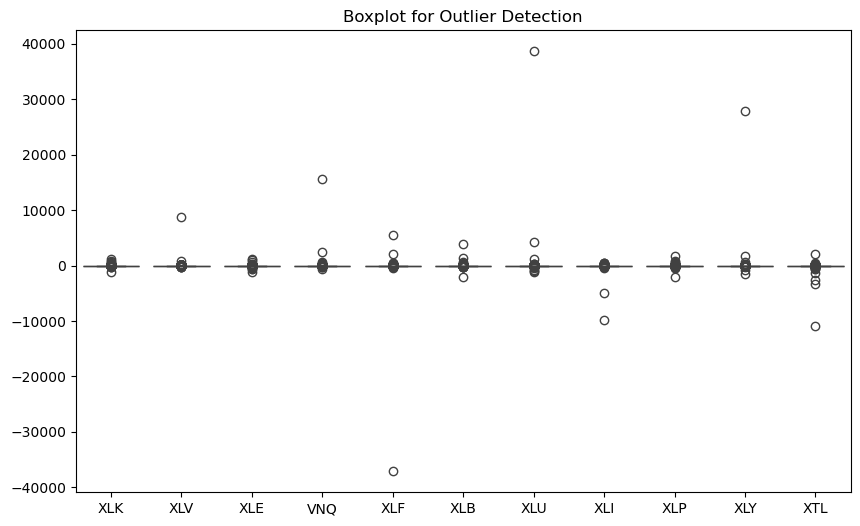

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shifted_concatenated_df)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [26]:
from scipy.stats.mstats import winsorize
shifted_concatenated_df['XLK'] = winsorize(np.array(shifted_concatenated_df['XLK']), limits=[.03, .03])
shifted_concatenated_df['XLV'] = winsorize(np.array(shifted_concatenated_df['XLV']), limits=[.03, .03])
shifted_concatenated_df['XLE'] = winsorize(np.array(shifted_concatenated_df['XLE']), limits=[.03, .03])
shifted_concatenated_df['VNQ'] = winsorize(np.array(shifted_concatenated_df['VNQ']), limits=[.03, .03])
shifted_concatenated_df['XLF'] = winsorize(np.array(shifted_concatenated_df['XLF']), limits=[.03, .03])
shifted_concatenated_df['XLB'] = winsorize(np.array(shifted_concatenated_df['XLB']), limits=[.03, .03])
shifted_concatenated_df['XLU'] = winsorize(np.array(shifted_concatenated_df['XLU']), limits=[.03, .03])
shifted_concatenated_df['XLI'] = winsorize(np.array(shifted_concatenated_df['XLI']), limits=[.03, .03])
shifted_concatenated_df['XLP'] = winsorize(np.array(shifted_concatenated_df['XLP']), limits=[.03, .03])
shifted_concatenated_df['XLY'] = winsorize(np.array(shifted_concatenated_df['XLY']), limits=[.03, .03])
shifted_concatenated_df['XTL'] = winsorize(np.array(shifted_concatenated_df['XTL']), limits=[.03, .03])

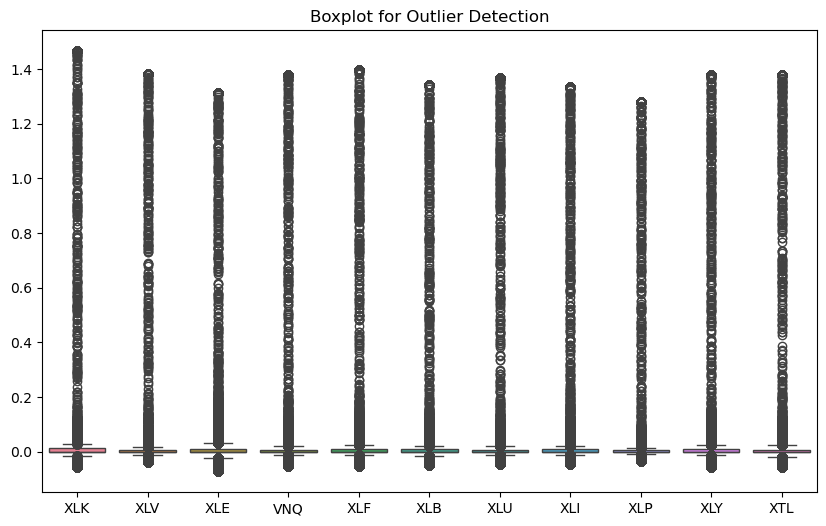

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shifted_concatenated_df)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [28]:
# Select X by dropping columns based on index positions
X = shifted_concatenated_df.drop(columns=shifted_concatenated_df.columns[day1_column_indices])

# Select y by indexing based on index positions
y = shifted_concatenated_df[('XLK', 'XLK_1Day_Return')]
# Convert any value not equal to 1 to 0
#y = y.apply(lambda x: 0 if x != 1 else 1)
y = y.apply(lambda x: 0 if x < 0 else 1)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Define the split ratio
split_ratio = 0.8

# Calculate the split index
split_index = int(len(shifted_concatenated_df) * split_ratio)

# Split into training and testing sets
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [29]:
X_test.tail(50)

XLK                                                  \
           XLK_2Day_Return XLK_3Day_Return XLK_5Day_Return XLK_8Day_Return   
Date                                                                         
2024-04-12        0.003468       -0.008830       -0.004989       -0.006865   
2024-04-15       -0.034866       -0.015583       -0.022744       -0.028304   
2024-04-16       -0.017817       -0.033717       -0.026490       -0.011513   
2024-04-17       -0.013249       -0.031983       -0.028626       -0.036813   
2024-04-18       -0.025674       -0.024514       -0.055272       -0.046700   
2024-04-19       -0.031783       -0.045747       -0.055272       -0.055272   
2024-04-22       -0.011853       -0.023133       -0.036076       -0.051097   
2024-04-23        0.023892        0.002798       -0.022948       -0.055272   
2024-04-24        0.019459        0.028567       -0.004124       -0.035975   
2024-04-25        0.002384        0.017246        0.005189       -0.019452   
2024-04-26        0.009090        0.013697        0.037916       -0.009566   
2024-04-29        0.015638        0.013432        0.033153        0.009253   
2024-04-30       -0.017815       -0.006731       -0.004363       -0.001577   
2024-05-01       -0.032040       -0.027874       -0.019038        0.008986   
2024-05-02        0.004025       -0.018088       -0.002733        0.014466   
2024-05-03        0.042675        0.031997        0.013612        0.027495   
2024-05-06        0.039937        0.054926        0.021127        0.034843   
2024-05-07        0.008442        0.036537        0.040709        0.033704   
2024-05-08       -0.000439        0.011306        0.054463        0.025071   
2024-05-09        0.002546       -0.000732        0.039176        0.020380   
2024-05-10        0.003417        0.006267        0.014762        0.047231   
2024-05-13        0.008448        0.008153        0.007710        0.063060   
2024-05-14        0.013623        0.017385        0.019975        0.057241   
2024-05-15        0.031572        0.036441        0.039982        0.051740   
2024-05-16        0.018959        0.027989        0.036674        0.035915   
2024-05-17       -0.005680        0.016704        0.030554        0.037012   
2024-05-20        0.009515        0.006009        0.037771        0.046231   
2024-05-21        0.013408        0.011164        0.030335        0.048247   
2024-05-22        0.003873        0.015674        0.009905        0.046706   
2024-05-23       -0.005916       -0.004293        0.005182        0.033316   
2024-05-24        0.000232        0.002469        0.015910        0.032879   
2024-05-28        0.012700        0.004462        0.008352        0.014411   
2024-05-29       -0.002138        0.006280        0.000326        0.011494   
2024-05-30       -0.029014       -0.024908       -0.024682       -0.009395   
2024-05-31       -0.021283       -0.027487       -0.015137       -0.019364   
2024-06-03        0.004099       -0.018814       -0.020912       -0.018494   
2024-06-04        0.004616        0.006196       -0.022999       -0.018639   
2024-06-05        0.024349        0.026932        0.005076        0.011388   
2024-06-06        0.018804        0.020931        0.025116       -0.000418   
2024-06-07       -0.001019        0.021172        0.025885       -0.002314   
2024-06-10        0.004881        0.001529        0.025915        0.006613   
2024-06-11        0.021197        0.023570        0.042817        0.049278   
2024-06-12        0.041129        0.043785        0.042721        0.070803   
2024-06-13        0.030204        0.049364        0.054486        0.076558   
2024-06-14        0.011687        0.034065        0.055983        0.078340   
2024-06-17        0.018958        0.027017        0.069257        0.070892   
2024-06-18        0.016427        0.020236        0.051051        0.075825   
2024-06-20       -0.009995        0.005007        0.016753        0.061271   
2024-06-21       -0.012964       -0.011725   

## Original Data and Untuned RandomForestClassifer

In [30]:
# Instantiate the model
clf = RandomForestClassifier(random_state=1)
#clf = RandomForestClassifier(class_weight='balanced', random_state=1)

# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [31]:
# Predict using the model
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [32]:
# Check the model's balanced accuracy on the training and test sets
print('\nOriginal Data and Base RandomForestClassifer')

# Print scores
print("--------------------------------------------------------")
x = balanced_accuracy_score(y_train, train_pred)
y = balanced_accuracy_score(y_test, test_pred)
print(balanced_accuracy_score(y_train, train_pred),'training score')
print(balanced_accuracy_score(y_test, test_pred),'testing score')
print(round((x-y), 16),'variance')

# Print classification reports
print("--------------------------------------------------------")
print(f"Classification Report - Original Data")
report = classification_report(y_test, test_pred, zero_division=1)
print(report)
print("--------------------------------------------------------")


Original Data and Base RandomForestClassifer
--------------------------------------------------------
1.0 training score
0.552785102175346 testing score
0.447214897824654 variance
--------------------------------------------------------
Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.51      0.34      0.41       148
           1       0.62      0.76      0.68       205

    accuracy                           0.59       353
   macro avg       0.56      0.55      0.55       353
weighted avg       0.57      0.59      0.57       353

--------------------------------------------------------


In [33]:
# Get the feature importance array
importances = clf.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances_sorted

[(0.00795670268785896, ('XTL', 'XTL_2D_1D_Ratio')),
 (0.007621332413788254, ('XTL', 'XTL_3D_2D_Ratio')),
 (0.007495916928669665, ('XLE', 'XLE_2Day_Return')),
 (0.007204684958871401, ('XLF', 'XLF_2D_Squared')),
 (0.006656235342473529, ('VNQ', 'VNQ_13D_3D_Avg')),
 (0.006432352695700408, ('XLY', 'XLY_8D_Squared')),
 (0.006425982394967109, ('XLV', 'XLV_2Day_Return')),
 (0.006397006478051931, ('XTL', 'XTL_3D_Squared')),
 (0.006231145726890707, ('XLB', 'XLB_3D_2D_Ratio')),
 (0.006212083268746244, ('XLK', 'XLK_13D_Squared')),
 (0.0061463158315085845, ('XLE', 'XLE_13D_Squared')),
 (0.00603435247802141, ('XLV', 'XLV_13D_Squared')),
 (0.006033124826932317, ('XLB', 'XLB_2Day_Return')),
 (0.00601899592419731, ('XLK', 'XLK_5D_Squared')),
 (0.006008445280365515, ('XTL', 'XTL_8D_Squared')),
 (0.006008205803075872, ('XLP', 'XLP_13D_Squared')),
 (0.005950339651617036, ('XLI', 'XLI_8D_Squared')),
 (0.005935408946164708, ('XLF', 'XLF_3D_Squared')),
 (0.005862207580029629, ('XLF', 'XLF_5D_Squared')),
 (0.

## RandomOverSampler Data and Untuned RandomForestClassifier

In [43]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [44]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [45]:
# Count distinct values
y_oversampled.value_counts()

(XLK, XLK_1Day_Return)
0    773
1    773
Name: count, dtype: int64

In [46]:
# Instantiate the model
ros_clf = RandomForestClassifier(random_state=1)

# Fit the model
ros_clf.fit(X_oversampled, y_oversampled)

RandomForestClassifier(random_state=1)

In [47]:
# Predict using the model
train_pred = ros_clf.predict(X_train)
test_pred = ros_clf.predict(X_test)

In [48]:
# Check the model's balanced accuracy on the training and test sets
print('\nRandomOverSampled Data and Untuned RandomForestClassifer')

# Print scores
print("--------------------------------------------------------")
x = balanced_accuracy_score(y_train, train_pred)
y = balanced_accuracy_score(y_test, test_pred)
print(balanced_accuracy_score(y_train, train_pred),'training score')
print(balanced_accuracy_score(y_test, test_pred),'testing score')
print(round((x-y), 16),'variance')

# Print classification reports
print("--------------------------------------------------------")
print(f"Classification Report - Original Data")
print(classification_report(y_test, test_pred))
print("--------------------------------------------------------")


RandomOverSampled Data and Untuned RandomForestClassifer
--------------------------------------------------------
1.0 training score
0.5180784442979565 testing score
0.4819215557020435 variance
--------------------------------------------------------
Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.45      0.36      0.40       148
           1       0.59      0.68      0.63       205

    accuracy                           0.54       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.53      0.54      0.53       353

--------------------------------------------------------


## RandomUnderSampler Data with Untuned RandomForestClassifier

In [49]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [50]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

In [51]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

(XLK, XLK_1Day_Return)
0    635
1    635
Name: count, dtype: int64

In [52]:
# Instantiate a new RandomForestClassier model
rus_clf = RandomForestClassifier(random_state=1)

# Fit the undersampled data the new model
rus_clf.fit(X_undersampled, y_undersampled)

RandomForestClassifier(random_state=1)

In [53]:
# Predict using the model
train_pred = rus_clf.predict(X_train)
test_pred = rus_clf.predict(X_test)

In [54]:
# Check the model's balanced accuracy on the training and test sets
print('\nRandomUnderSampled Data and Untuned RandomForestClassifer')

# Print scores
print("--------------------------------------------------------")
x = balanced_accuracy_score(y_train, train_pred)
y = balanced_accuracy_score(y_test, test_pred)
print(balanced_accuracy_score(y_train, train_pred),'training score')
print(balanced_accuracy_score(y_test, test_pred),'testing score')
print(round((x-y), 16),'variance')

# Print classification reports
print("--------------------------------------------------------")
print(f"Classification Report - Original Data")
print(classification_report(y_test, test_pred))
print("--------------------------------------------------------")


RandomUnderSampled Data and Untuned RandomForestClassifer
--------------------------------------------------------
0.9540750323415266 training score
0.5248681608437706 testing score
0.429206871497756 variance
--------------------------------------------------------
Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.44      0.55      0.49       148
           1       0.61      0.50      0.55       205

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.54      0.52      0.52       353

--------------------------------------------------------


## Manual Hyperparameter Tuning

In [75]:
# Try the following values for max_depth
max_depths = range(2, 30)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    # Initialize the classifier with parameter variables
    clf = RandomForestClassifier(max_depth = depth, random_state=1)
    
    # Fit the data
    clf.fit(X_train, y_train)

    # Make predictions
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    #train_score = calculate_average_balanced_accuracy(y_train_df, train_pred_df)
    #test_score = calculate_average_balanced_accuracy(y_test_df, test_pred_df)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
max_depth,,
16,1.0,0.559904
23,1.0,0.552785
28,1.0,0.552785
27,1.0,0.552785
26,1.0,0.552785


In [76]:
# Sort the dataframe by test_score in descending order and get the top 5
top_max_depth = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5
top_max_depth

[16, 23, 28, 27, 26]

<Axes: xlabel='max_depth'>

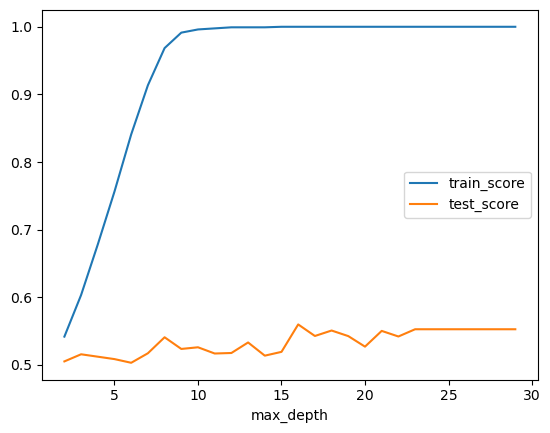

In [77]:
# Plot the results
models_df.plot()

In [78]:
# Try the following values for n_estimators
estimators = range(100, 150, 1)
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

# Loop through each value in max_depths
for n in estimators:
    # Initialize the classifier with parameter variables
    clf = RandomForestClassifier(n_estimators = n, random_state=1)
    
    # Fit the data
    clf.fit(X_train, y_train)

    # Make predictions
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    #train_score = calculate_average_balanced_accuracy(y_train_df, train_pred_df)
    #test_score = calculate_average_balanced_accuracy(y_test_df, test_pred_df)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['n_estimators'].append(n)

# Create a dataframe from the models dictionary with n_estimators as the index
models_df = pd.DataFrame(models).set_index('n_estimators')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
n_estimators,,
103,1.0,0.563102
101,1.0,0.563102
102,1.0,0.562541
112,1.0,0.562162
111,1.0,0.561783


In [79]:
# Sort the dataframe by test_score in descending order and get the top 5
top_n_estimators = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5
top_n_estimators

[103, 101, 102, 112, 111]

<Axes: xlabel='n_estimators'>

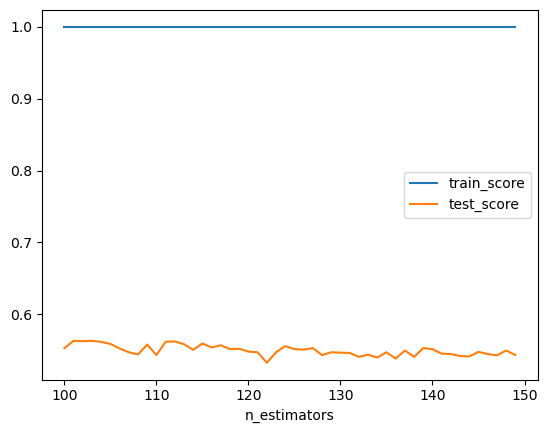

In [80]:
# Plot the results
models_df.plot()

In [81]:
# Try the following values for min_samples_leaf
min_leaf = range(2, 30)
models = {'train_score': [], 'test_score': [], 'min_samples_leaf': []}

# Loop through each value in max_depths
for min in min_leaf:
    # Initialize the classifier with parameter variables
    clf = RandomForestClassifier(min_samples_split = min, random_state=1)
    
    # Fit the data
    clf.fit(X_train, y_train)

    # Make predictions
    train_pred = clf.predict(X_train)
    test_pred =clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['min_samples_leaf'].append(min)

# Create a dataframe from the models dictionary with min_leaf as the index
models_df = pd.DataFrame(models).set_index('min_samples_leaf')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
min_samples_leaf,,
27,0.987683,0.558586
2,1.000000,0.552785
8,0.999213,0.547330
13,0.999213,0.544331
9,0.999213,0.543771


In [82]:
# Sort the dataframe by test_score in descending order and get the top 5
top_min_samples_leaf = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5 
top_min_samples_leaf

[27, 2, 8, 13, 9]

<Axes: xlabel='min_samples_leaf'>

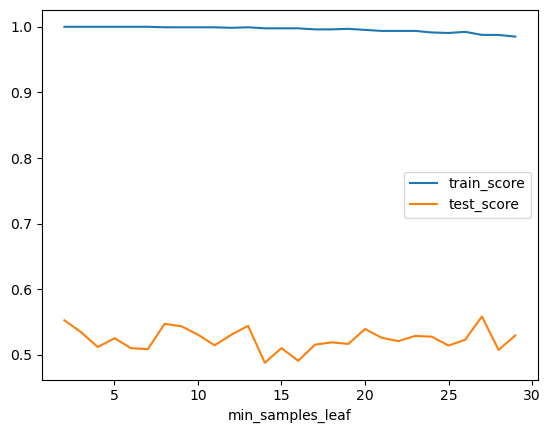

In [83]:
# Plot the results
models_df.plot()

In [84]:
# Try the following values for min_split
min_split = range(2, 30)
models = {'train_score': [], 'test_score': [], 'min_samples_split': []}

# Loop through each value in max_depths
for min in min_split:
    # Initialize the classifier with parameter variables
    clf = RandomForestClassifier(min_samples_split = min, random_state=1)
    
    # Fit the data
    clf.fit(X_train, y_train)

    # Make predictions
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['min_samples_split'].append(min)

# Create a dataframe from the models dictionary with min_split as the index
models_df = pd.DataFrame(models).set_index('min_samples_split')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
min_samples_split,,
27,0.987683,0.558586
2,1.000000,0.552785
8,0.999213,0.547330
13,0.999213,0.544331
9,0.999213,0.543771


In [85]:
# Sort the dataframe by test_score in descending order and get the top 5
top_min_samples_split = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5 
top_min_samples_split

[27, 2, 8, 13, 9]

<Axes: xlabel='min_samples_split'>

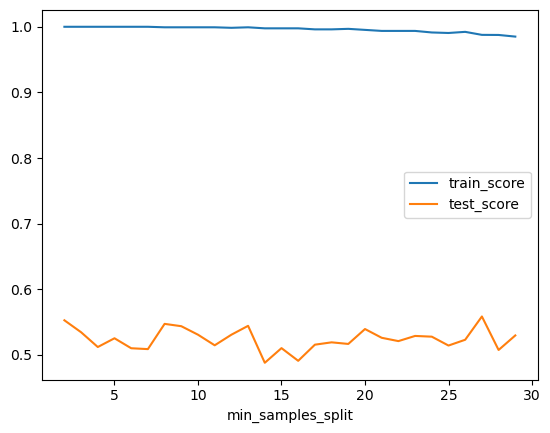

In [86]:
# Plot the results
models_df.plot()

In [88]:
# Dictionary with top 5 values for each parameter
params = {
    'n_estimators': top_n_estimators,
    'min_samples_split': top_min_samples_split,
    'max_depth': top_max_depth,
    'min_samples_leaf': top_min_samples_leaf
}

# Initialize a dictionary to store results
results = {'n_estimators': [], 'max_depth': [], 'min_samples_split': [], 'min_samples_leaf': [], 'train_score': [], 'test_score': []}

# Loop through all combinations of parameters
for n in params['n_estimators']:
    for d in params['max_depth']:
        for mss in params['min_samples_split']:
            for msl in params['min_samples_leaf']:
                # Initialize the classifier with parameter variables
                clf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=mss, min_samples_leaf=msl, random_state=1)
    
                # Fit the data
                clf.fit(X_train, y_train)

                # Make predications
                train_pred = clf.predict(X_train)
                test_pred = clf.predict(X_test)

                # Calculate balanced accuracy scores
                train_score = balanced_accuracy_score(y_train, train_pred)
                test_score = balanced_accuracy_score(y_test, test_pred)

                # Append scores
                results['n_estimators'].append(n)
                results['max_depth'].append(d)
                results['min_samples_split'].append(mss)
                results['min_samples_leaf'].append(msl)
                results['train_score'].append(train_score)
                results['test_score'].append(test_score)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [89]:
sorted_results_df = results_df.sort_values(by='test_score', ascending=False)
print(sorted_results_df.head(5))

     n_estimators  max_depth  min_samples_split  min_samples_leaf  \
279           102         23                 27                 9   
354           102         26                 27                 9   
329           102         27                 27                 9   
304           102         28                 27                 9   
479           112         26                 27                 9   

     train_score  test_score  
279     0.964482    0.553708  
354     0.964482    0.553708  
329     0.964482    0.553708  
304     0.964482    0.553708  
479     0.967773    0.552769  


In [90]:
# Initialize the classifier with parameter variables
clf = RandomForestClassifier(n_estimators=102, max_depth=23, min_samples_split=27, min_samples_leaf=9, random_state=1) 

# Fit the data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=23, min_samples_leaf=9, min_samples_split=27,
                       n_estimators=102, random_state=1)

In [91]:
# Predict using the model
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [92]:
# Check the model's balanced accuracy on the training and test sets
print('\nRandomUnderSampled Data and Hyperparameter Tuned RandomForestClassifer')

# Print scores
print("--------------------------------------------------------")
x = balanced_accuracy_score(y_train, train_pred)
y = balanced_accuracy_score(y_test, test_pred)
print(balanced_accuracy_score(y_train, train_pred),'training score')
print(balanced_accuracy_score(y_test, test_pred),'testing score')
print(round((x-y), 16),'variance')

# Print classification reports
print("--------------------------------------------------------")
print(f"Classification Report - Original Data")
print(classification_report(y_test, test_pred))
print("--------------------------------------------------------")


RandomUnderSampled Data and Hyperparameter Tuned RandomForestClassifer
--------------------------------------------------------
0.9644823827810657 training score
0.5537079762689519 testing score
0.4107744065121138 variance
--------------------------------------------------------
Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.55      0.26      0.36       148
           1       0.61      0.84      0.71       205

    accuracy                           0.60       353
   macro avg       0.58      0.55      0.53       353
weighted avg       0.59      0.60      0.56       353

--------------------------------------------------------


## XGBoost Classifier

In [63]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

In [71]:
# Try the following values for learning_rate
rate = np.arange(0.01, 1.1, 0.01)
models = {'train_score': [], 'test_score': [], 'learning_rate': []}

# Loop through each value in learning_rates
for r in rate:
    # Initialize the classifier with parameter variables
    xgb_clf = XGBClassifier(learning_rate = r, tree_method='approx', random_state=1)

    # Fit the data
    xgb_clf.fit(X_train, y_train)

    # Make predictions
    train_pred = xgb_clf.predict(X_train)
    test_pred = xgb_clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['learning_rate'].append(r)

# Create a dataframe from the models dictionary with learning_rate as the index
models_df = pd.DataFrame(models).set_index('learning_rate')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
learning_rate,,
0.83,1.0,0.569314
0.94,1.0,0.567831
0.68,1.0,0.559558
0.75,1.0,0.558619
1.02,1.0,0.556559


In [65]:
# Sort the dataframe by test_score in descending order and get the top 5
top_learning_rates = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5 
top_learning_rates

[0.6900000000000001, 0.37, 0.27, 0.9500000000000001, 0.2]

<Axes: xlabel='learning_rate'>

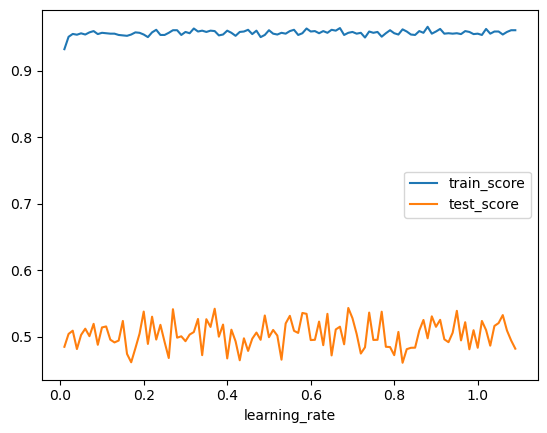

In [66]:
# Plot the results
models_df.plot()

In [72]:
# Try the following values for n_estimators
estimators = range(120, 150, 1)
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

# Loop through each value in n_estimators
for n in estimators:
    # Initialize the classifier with parameter variables
    xgb_clf = XGBClassifier(n_estimators = n, tree_method='approx', random_state=1)

    # Fit the data
    xgb_clf.fit(X_train, y_train)

    # Make predictions
    train_pred = xgb_clf.predict(X_train)
    test_pred = xgb_clf.predict(X_test)

    # Calculate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['n_estimators'].append(n)

# Create a dataframe from the models dictionary with n_estimators as the index
models_df = pd.DataFrame(models).set_index('n_estimators')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
n_estimators,,
131,1.0,0.545485
130,1.0,0.543045
133,1.0,0.539667
129,1.0,0.539667
132,1.0,0.538728


In [73]:
# Sort the dataframe by test_score in descending order and get the top 5
top_n_estimators = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5
top_n_estimators

[131, 130, 133, 129, 132]

<Axes: xlabel='n_estimators'>

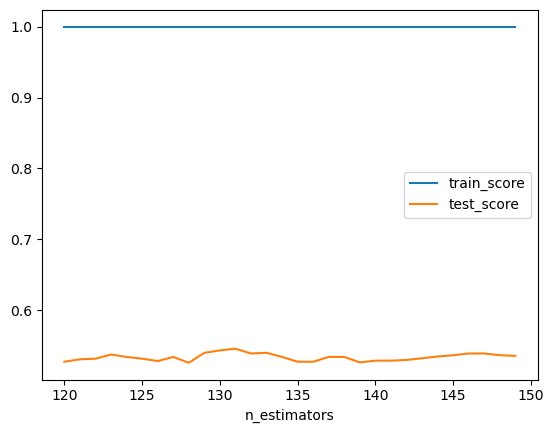

In [74]:
# Plot the results
models_df.plot()

In [93]:
# Try the following values for max_depth
max_depths = range(1, 30)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    # Initialize the classifier with parameter variables
    xgb_clf = XGBClassifier(max_depth = depth, tree_method='approx', random_state=1)
    
    # Fit the data
    xgb_clf.fit(X_train, y_train)

    # Make predictions
    train_pred = xgb_clf.predict(X_train)
    test_pred = xgb_clf.predict(X_test)

    # Caclulate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
max_depth,,
13,1.0,0.568573
14,1.0,0.546045
29,1.0,0.537788
17,1.0,0.537788
28,1.0,0.537788


In [94]:
# Sort the dataframe by test_score in descending order and get the top 5
top_max_depth = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5 
top_max_depth

[13, 14, 29, 17, 28]

<Axes: xlabel='max_depth'>

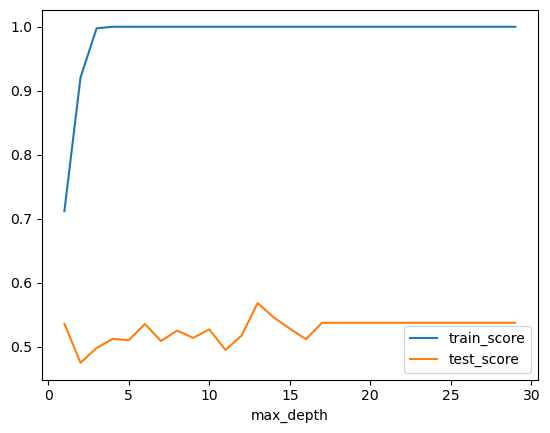

In [95]:
# Plot the results
models_df.plot()

In [96]:
# Try the following values for max_leaves
max_leaves = range(1, 30)
models = {'train_score': [], 'test_score': [], 'max_leaves': []}

# Loop through each value in max_depths
for leaf in max_leaves:
    # Initialize the classifier with parameter variables
    xgb_clf = XGBClassifier(max_leaves = leaf, tree_method='approx', random_state=1)
    
    # Fit the data
    xgb_clf.fit(X_train, y_train)

    # Make predictions
    train_pred = xgb_clf.predict(X_train)
    test_pred = xgb_clf.predict(X_test)

    # Caclulate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_leaves'].append(leaf)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_leaves')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
max_leaves,,
10,1.000000,0.563134
20,1.000000,0.539848
22,1.000000,0.538926
2,0.712145,0.536272
8,0.997638,0.533289


In [97]:
# Sort the dataframe by test_score in descending order and get the top 5
top_max_leaves = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5
top_max_leaves

[10, 20, 22, 2, 8]

<Axes: xlabel='max_leaves'>

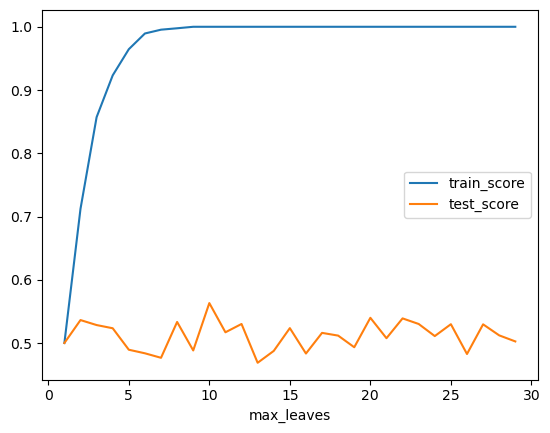

In [98]:
# Plot the results
models_df.plot()

In [99]:
# Try the following values for subsample
subsample = np.arange(0, 1, .01)
models = {'train_score': [], 'test_score': [], 'subsample': []}

# Loop through each value in max_depths
for sample in subsample:
    # Initialize the classifier with parameter variables
    xgb_clf = XGBClassifier(subsample = sample, tree_method='approx', random_state=1)
    
    # Fit the undersampled data the new model
    xgb_clf.fit(X_train, y_train)

    # Make predictions
    train_pred = xgb_clf.predict(X_train)
    test_pred = xgb_clf.predict(X_test)

    # Caclulate balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append scores
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['subsample'].append(sample)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('subsample')

# Display df
display(models_df.sort_values(by='test_score', ascending=False).head(5))

,train_score,test_score
subsample,,
0.01,0.542001,0.577966
0.86,1.000000,0.556378
0.91,1.000000,0.554120
0.48,1.000000,0.554120
0.30,0.997132,0.553378


In [100]:
# Sort the dataframe by test_score in descending order and get the top 5
top_subsample = models_df.sort_values(by='test_score', ascending=False).head(5).index.tolist()

# Display the top 5
top_subsample

[0.01, 0.86, 0.91, 0.48, 0.3]

<Axes: xlabel='subsample'>

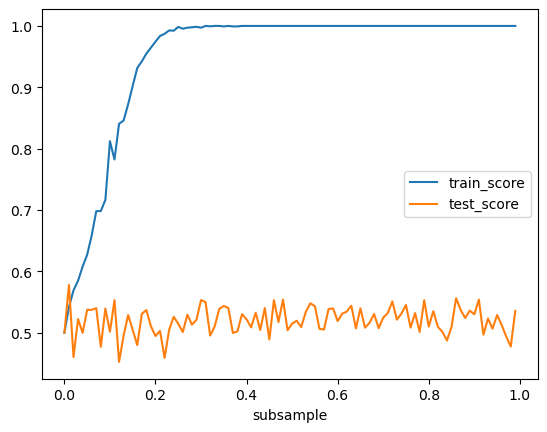

In [101]:
# Plot the results
models_df.plot()

In [ ]:
# Dictionary with 5 values for each parameter
params = {
    'n_estimators': top_n_estimators,
    'max_depth': top_max_depth,
    'learning_rate': top_learning_rates,
    'max_leaves': top_max_leaves,
    'subsample': top_subsample
}

# Initialize a dictionary to store results
results = {'n_estimators': [], 'max_depth': [], 'learning_rate': [],'max_leaves': [], 'subsample': [], 'train_score': [], 'test_score': []}

# Loop through all combinations of parameters
for n in params['n_estimators']:
    for d in params['max_depth']:
        for lr in params['learning_rate']:
            for ml in params['max_leaves']:
                for s in params['subsample']:
                    # Initialize the classifier with current parameters
                    xgb_clf = XGBClassifier(n_estimators=n, learning_rate=lr, max_depth=d, max_leaves=ml, subsample=s, tree_method='approx', random_state=1)
                
                    # Fit the undersampled data
                    xgb_clf.fit(X_train, y_train)
    
                    # Make predictions
                    train_pred = xgb_clf.predict(X_train)
                    test_pred = xgb_clf.predict(X_test)
    
                    # Calculate balanced accuracy scores
                    train_score = balanced_accuracy_score(y_train, train_pred)
                    test_score = balanced_accuracy_score(y_test, test_pred)
    
                    # Append results to the dictionary
                    results['n_estimators'].append(n)
                    results['max_depth'].append(d)
                    results['learning_rate'].append(lr)
                    results['max_leaves'].append(ml)
                    results['subsample'].append(s)
                    results['train_score'].append(train_score)
                    results['test_score'].append(test_score)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [ ]:
sorted_results_df = results_df.sort_values(by='test_score', ascending=False)
print(sorted_results_df.head(5))

In [ ]:
# For Classification
# Initialize the classifier with current parameters
xgb_clf = XGBClassifier(n_estimators=243, max_depth=20, learning_rate=.08, max_leaves=23, subsample=.97, tree_method='approx', min_split_loss=0, min_child_weight=1, random_state=1)

# Fit the undersampled data
xgb_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
train_pred = xgb_clf.predict(X_train)
test_pred = xgb_clf.predict(X_test)

In [ ]:
# Check the model's balanced accuracy on the training and test sets
print('\nRandomUnderSampled Data and Tuned XGB Classifer')

# Print scores
print("--------------------------------------------------------")
x = balanced_accuracy_score(y_train, train_pred)
y = balanced_accuracy_score(y_test, test_pred)
print(balanced_accuracy_score(y_train, train_pred),'training score')
print(balanced_accuracy_score(y_test, test_pred),'testing score')
print(round((x-y), 16),'variance')

# Print classification reports
print("--------------------------------------------------------")
print(f"Classification Report - Original Data")
print(classification_report(y_test, test_pred))
print("--------------------------------------------------------")